In [1]:
import importlib
import sys
sys.path.append('../src')

import qa
importlib.reload(qa)
import qa

import plot
importlib.reload(plot)
import plot

import pickle
import numpy as np
import pandas as pd

import re
import random
import ast

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import pearsonr

# Plotting workspace

In [ ]:
PATH = '../data/MMLU-Pro/sample_results/mmlu_list_ad.pkl'
results = pickle.load(open(PATH, 'rb'))
accuracy = [r['r^org']==r['answer'] for r in results]
conf = [r['p_r^org'] for r in results]



In [ ]:
PATH = '../data/MMLU-Pro/sample_results/mmlu_list_da.pkl'
plot_from_file(PATH, metric = 'consistency', vlimit=(0,1))


# Data Generation

## MMLU

In [ ]:
# from datasets import load_dataset

# ds = load_dataset("TIGER-Lab/MMLU-Pro")

# mmlu = {}
# for ele in ds['test']:
#     if ele['category'] not in mmlu:
#         mmlu[ele['category']] = []
#     mmlu[ele['category']].append(ele)

# import random

# # mmlu_samples = []
# # for cat in mmlu:
# #     mmlu_samples.extend(random.Random(0).sample(mmlu[cat], 10))

# # with open('../data/mmlu_samples_140.pkl', 'wb') as f:
# #     pickle.dump(mmlu_samples, f)

# mmlu_full = []
# for cat in mmlu:
#     mmlu_full.extend(mmlu[cat])
    
# with open('../data/MMLU-Pro/results/mmlu_full.pkl', 'wb') as f:
#     pickle.dump(mmlu_full, f)

# print("total number of questions in MMLU-Pro:", len(mmlu_full))

# res_oqa_org = qa.qa_eval_org(mmlu_full)

# with open('../data/MMLU-Pro/results/mmlu_org.pkl', 'wb') as f:
#     pickle.dump(res_oqa_org, f)

/home/jch0/.conda/envs/jch0/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating validation split: 100%|██████████| 70/70 [00:00<00:00, 19347.70 examples/s]


total number of questions in MMLU-Pro: 12032


Processing MMLU: 100%|██████████| 12032/12032 [03:19<00:00, 60.35it/s] 


In [ ]:
# with open('../data/MMLU-Pro/results/mmlu_org.pkl', 'rb') as f:
#     res_mmlu_org = pickle.load(f)

# type_names = ['1st', '2nd', 'rnd', 'lst']
# for disagree_type in type_names:
#     results = qa.qa_eval_one(res_mmlu_org, disagree_type)

#     with open(f'../data/MMLU-Pro/results/mmlu_one_{disagree_type}.pkl', 'wb') as f:
#         pickle.dump(results, f)

Processing MMLU: 100%|██████████| 12032/12032 [03:22<00:00, 59.41it/s] 


In [ ]:
with open('../data/MMLU-Pro/sample_results/mmlu_org.pkl', 'rb') as f:
    res_mmlu_org = pickle.load(f)


input_feat_list = []
for disagree_size in range(11): # row
    input_row = []
    for agree_size in range(11): # column
        
        eval_feat = {
            'type': 'grp_list',
            'agree_size': agree_size,
            'disagree_size': disagree_size,
            'disagree_type': '2nd',
            'q_type': 'factual',
            'order': 'da'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(res_mmlu_org, input_feat_list)

with open('../data/MMLU-Pro/sample_results/mmlu_list_da.pkl', 'wb') as f:
    pickle.dump(results, f)


Processing grp_list samples...


Processing QA: 100%|██████████| 16940/16940 [04:25<00:00, 63.74it/s] 


In [ ]:
with open('../data/MMLU-Pro/sample_results/res_mmlu_org.pkl', 'rb') as f:
    res_mmlu_org = pickle.load(f)


input_feat_list = []
for group_size in [4,12,50,100,1000]: # row
    input_row = []
    for agree_ratio in [0, 0.25, 0.50, 0.75, 1]: # column
        
        eval_feat = {
            'type': 'grp_ratio',
            'group_size': group_size,
            'disagree_ratio': 1-agree_ratio,
            'disagree_type': '2nd',
            'q_type': 'factual',
            'order': 'ad'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(res_mmlu_org, input_feat_list)
    #     result, accuracy = qa.qa_eval_matrix(res_mmlu_org, eval_feat)
    #     output_row.append(accuracy)
    # output_list.append(output_row)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

with open('../data/MMLU-Pro/sample_results/mmlu_ratio_ad.pkl', 'wb') as f:
    pickle.dump(results, f)


### Reason Generation and Reason in-context

In [ ]:
# with open('../data/MMLU-Pro/sample_results/res_mmlu_org.pkl', 'rb') as f:
#     res_mmlu_org = pickle.load(f)

# mmlu_org_reason = qa.qa_generate_reason(res_mmlu_org, '2nd', 10)

# with open('../data/MMLU-Pro/sample_results/mmlu_org_reason.pkl', 'wb') as f:
#     pickle.dump(mmlu_org_reason, f)

Generating reasons: 100%|██████████| 2800/2800 [05:15<00:00,  8.86it/s]


In [ ]:
with open('../data/MMLU-Pro/sample_results/mmlu_org_reason.pkl', 'rb') as f:
    mmlu_org_reason = pickle.load(f)

input_feat_list = []
for disagree_size in range(11): # row
    input_row = []
    for agree_size in range(11): # column
        
        eval_feat = {
            'type': 'grp_disc',
            'use_reason': True,
            'agree_size': agree_size,
            'disagree_size': disagree_size,
            'disagree_type': '2nd',
            'q_type': 'factual',
            'order': 'da'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(mmlu_org_reason, input_feat_list)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

with open('../data/MMLU-Pro/sample_results/mmlu_reason_da.pkl', 'wb') as f:
    pickle.dump(results, f)



Processing grp_discrete samples...


Processing QA: 100%|██████████| 16940/16940 [06:27<00:00, 43.67it/s] 


### bar plot for self-confidence vs consistency

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
PATH = '../data/MMLU-Pro/results/mmlu_one_2nd.pkl'
with open(PATH, 'rb') as f:
    results = pickle.load(f)

# Extract accuracy and confidence
accuracy = np.array([r['r'] == r['answer'] for r in results])
consistency = np.array([r['r'] == r['r^org'] for r in results])
self_conf = np.array([r['p_r^org'] for r in results])
other_conf = np.array([r['p_r_j'] for r in results])

# Bin confidence scores into 10 bins from 0 to 1
bins = np.linspace(0, 1, 11)
bin_indices = np.digitize(self_conf, bins) - 1  # Adjust bin index to start at 0

# Calculate average accuracy for each bin
bin_accuracy = []
bin_centers = []

for i in range(10):
    indices = bin_indices == i
    if np.any(indices):
        avg_acc = consistency[indices].mean()
    else:
        avg_acc = np.nan
    bin_accuracy.append(avg_acc)
    bin_centers.append((bins[i] + bins[i+1]) / 2)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, bin_accuracy, width=0.09, edgecolor='black')
plt.xlabel('Self-Confidence')
plt.ylabel('Average Consistency')
plt.title('Consistency vs Self-Confidence')
plt.xticks(np.round(bin_centers, 2))
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### in/out-domain

In [ ]:
# with open('../data/MMLU-Pro/results/mmlu_org.pkl', 'rb') as f:
#     res_mmlu_org = pickle.load(f)

# results = qa.qa_eval_domain(res_mmlu_org, '2nd')

# with open(f'../data/MMLU-Pro/results/mmlu_domain_2nd.pkl', 'wb') as f:
#     pickle.dump(results, f)


Processing QA: 100%|██████████| 24064/24064 [05:37<00:00, 71.21it/s] 


In [ ]:
# domains = set()
# for ele in res_mmlu_org:
#     domains.add(ele['category'])

# print("total number of domains in MMLU-Pro:", len(domains))
# print("domains in MMLU-Pro:", domains)

total number of domains in MMLU-Pro: 14
domains in MMLU-Pro: {'math', 'engineering', 'physics', 'computer science', 'chemistry', 'psychology', 'law', 'economics', 'philosophy', 'history', 'biology', 'other', 'business', 'health'}


In [ ]:
with open('../data/MMLU-Pro/results/mmlu_domain_2nd.pkl', 'rb') as f:
    results = pickle.load(f)

with open('../data/MMLU-Pro/results/mmlu_one_2nd.pkl', 'rb') as f:
    res_mmlu_one = pickle.load(f)

results_in_domain = results['in_domain']
results_out_domain = results['out_domain']
results_control = res_mmlu_one

consistence_in_domain  = np.array([r['r'] == r['r^org'] for r in results_in_domain])
consistence_out_domain   = np.array([r['r'] == r['r^org'] for r in results_out_domain])
consistence_control = np.array([r['r'] == r['r^org'] for r in results_control])

# Calculate means and confidence intervals
domain_groups = [consistence_in_domain, consistence_out_domain, consistence_control]
mean_consistance = [group.mean() for group in domain_groups]
confidence_intervals = [stats.t.interval(
    0.95, len(group)-1, loc=group.mean(), scale=stats.sem(group)) for group in domain_groups]

# Extracting lower and upper bounds for plotting
ci_lower = [mean - ci[0] for mean, ci in zip(mean_consistance, confidence_intervals)]
ci_upper = [ci[1] - mean for mean, ci in zip(mean_consistance, confidence_intervals)]

in_out_domain = ['In-Domain', 'Out-Domain', 'Control']

# Plotting with confidence intervals
plt.figure(figsize=(4, 6))
plt.bar(in_out_domain, mean_consistance, yerr=[ci_lower, ci_upper], capsize=10,
        color=['skyblue', 'lightgreen', 'lightgray'], alpha=0.7)
plt.ylabel('Consistency (0-1)')
plt.xlabel('Expertise')
plt.title('Consistency by Expertise \nwith 95% Confidence Intervals')
plt.ylim(0, 1)

# Display values on the bars
for i, val in enumerate(mean_consistance):
    plt.text(i, val + max(ci_upper)*1, f'{val:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
with open('../data/MMLU-Pro/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

results = qa.qa_eval_hierarchy(res_org, '2nd')

with open(f'../data/MMLU-Pro/results/hierarchy_2nd.pkl', 'wb') as f:
    pickle.dump(results, f)


Processing QA batch 25: 100%|██████████| 64/64 [00:01<00:00, 34.20it/s]


## GPQA

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
hf_token = input("Enter your Hugging Face token: ")
ds = load_dataset("Idavidrein/gpqa", "gpqa_diamond", token = hf_token)

Using the latest cached version of the dataset since Idavidrein/gpqa couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'gpqa_diamond' at /home/jch0/.cache/huggingface/datasets/Idavidrein___gpqa/gpqa_diamond/0.0.0/90b8e5be2b1d3d2dbfe016cdab47981150600c4a (last modified on Wed Apr 30 08:52:17 2025).


In [ ]:

gpqa_full = []
for q_idx, ele in enumerate(ds['train']):
    input_ele = {}
    input_ele['question_id'] = q_idx
    input_ele['category'] = ele['High-level domain']
    input_ele['question'] = ele['Question']
    choices = [ele['Correct Answer'], ele['Incorrect Answer 1'], ele['Incorrect Answer 2'], ele['Incorrect Answer 3']]
    random.Random(q_idx).shuffle(choices)
    input_ele['options'] = choices
    input_ele['answer'] = 'ABCD'[choices.index(ele['Correct Answer'])]

    gpqa_full.append(input_ele)

with open('../data/GPQA/results/full.pkl', 'wb') as f:
    pickle.dump(gpqa_full, f)

print("total number of questions in GPQA:", len(gpqa_full))

res_gpqa_org = qa.qa_eval_org(gpqa_full)

with open('../data/GPQA/results/org.pkl', 'wb') as f:
    pickle.dump(res_gpqa_org, f)

total number of questions in GPQA: 198


Processing QA: 100%|██████████| 198/198 [00:04<00:00, 41.37it/s]


In [ ]:
with open('../data/GPQA/results/gpqa_org.pkl', 'rb') as f:
    res_gpqa_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_gpqa_org, disagree_type)
    with open(f'../data/GPQA/results/gpqa_one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 198/198 [00:06<00:00, 30.46it/s]


In [ ]:
with open('../data/GPQA-Diamond/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

results = qa.qa_eval_domain(res_org, '2nd')

with open(f'../data/GPQA-Diamond/results/domain_2nd.pkl', 'wb') as f:
    pickle.dump(results, f)


Processing QA: 100%|██████████| 396/396 [00:07<00:00, 53.61it/s]


In [ ]:
with open('../data/GPQA-Diamond/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

results = qa.qa_eval_hierarchy(res_org, '2nd')

with open(f'../data/GPQA-Diamond/results/hierarchy_2nd.pkl', 'wb') as f:
    pickle.dump(results, f)

Processing QA batch 1: 100%|██████████| 396/396 [00:08<00:00, 45.27it/s]


## ARC-Challenge

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("allenai/ai2_arc", "ARC-Challenge")

In [ ]:

arc_full = []
for q_idx, ele in enumerate(ds['test']):
    input_ele = {}
    input_ele['question_id'] = ele['id']
    # input_ele['category'] = ele['High-level domain']
    input_ele['question'] = ele['question']
    input_ele['options'] = ele["choices"]["text"]
    answer_key = ele["answerKey"]
    if answer_key not in "ABCDE":
        answer_key = "ABCDE"[int(answer_key)-1]
    input_ele['answer'] = answer_key

    arc_full.append(input_ele)

with open('../data/ARC/results/full.pkl', 'wb') as f:
    pickle.dump(arc_full, f)

print("total number of questions in ARC:", len(arc_full))

res_arc_org = qa.qa_eval_org(arc_full)

with open('../data/ARC/results/org.pkl', 'wb') as f:
    pickle.dump(res_arc_org, f)

total number of questions in ARC: 1172


Processing QA: 100%|██████████| 1172/1172 [00:16<00:00, 71.50it/s] 


In [ ]:
with open('../data/ARC/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_org, disagree_type)
    with open(f'../data/ARC/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 1172/1172 [00:15<00:00, 73.90it/s] 


In [ ]:
with open('../data/ARC/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

results = qa.qa_eval_hierarchy(res_org, '2nd')

with open(f'../data/ARC/results/hierarchy_2nd.pkl', 'wb') as f:
    pickle.dump(results, f)

Processing QA batch 3: 100%|██████████| 344/344 [00:07<00:00, 44.66it/s]


## OpinionQA

In [ ]:
oqa_df = pd.DataFrame()
# get all file names under PATH
import os
PATH = '../data/OpinionQA/model_input/'
for file in os.listdir(PATH):
    if re.match(r'.+W\d{2}\.csv', file):
        target_df = pd.read_csv(PATH + file, delimiter='\t')
        target_df = target_df[["key", "question", "options"]]
        target_df.columns = ["question_id", "question", "options"]
        oqa_df = pd.concat([oqa_df, target_df], ignore_index=True)

question_id = oqa_df['question_id'].tolist()
question = oqa_df['question'].tolist()
options = oqa_df['options'].tolist()
options = [ast.literal_eval(x) for x in options]

for ele in options:
    if 'Refused' in ele:
        ele.remove('Refused')

oqa_list = []
for i in range(len(question_id)):
    oqa_list.append({"question_id": question_id[i], "question": question[i], "options": options[i]})

print("total number of questions in OpinionQA:", len(oqa_list))
# oqa_sample_list = random.Random(0).sample(oqa_list, 140)
# print("total number of questions in OpinionQA sample:", len(oqa_sample_list))

# res_oqa_org = qa.qa_eval_org(oqa_sample_list)

# with open('../data/OpinionQA/sample_results/res_oqa_org.pkl', 'wb') as f:
#     pickle.dump(res_oqa_org, f)

res_oqa_org = qa.qa_eval_org(oqa_list)

with open('../data/OpinionQA/results/org.pkl', 'wb') as f:
    pickle.dump(res_oqa_org, f)

total number of questions in OpinionQA: 1506


Processing QA: 100%|██████████| 1506/1506 [00:38<00:00, 39.38it/s]


In [ ]:
with open('../data/OpinionQA/results/org.pkl', 'rb') as f:
    res_oqa_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_oqa_org, disagree_type)
    with open(f'../data/OpinionQA/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 1506/1506 [00:23<00:00, 64.19it/s] 


In [ ]:
with open('../data/OpinionQA/sample_results/res_oqa_org.pkl', 'rb') as f:
    res_oqa_org = pickle.load(f)


input_feat_list = []
for disagree_size in range(11): # row
    input_row = []
    for agree_size in range(11): # column
        
        eval_feat = {
            'type': 'grp_count',
            'agree_size': agree_size,
            'disagree_size': disagree_size,
            'disagree_type': '2nd',
            'order': 'ad',
            'q_type': 'opinion'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(res_oqa_org, input_feat_list)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

with open('../data/OpinionQA/sample_results/oqa_count_ad.pkl', 'wb') as f:
    pickle.dump(results, f)



Processing grp_count samples...


Processing MMLU: 100%|██████████| 16940/16940 [04:57<00:00, 56.99it/s] 


### Reason Generation and Reason in-context

In [ ]:
with open('../data/OpinionQA/sample_results/oqa_org.pkl', 'rb') as f:
    res_oqa_org = pickle.load(f)

oqa_org_reason = qa.qa_generate_reason(res_oqa_org, '2nd', 10)

with open('../data/OpinionQA/sample_results/oqa_org_reason.pkl', 'wb') as f:
    pickle.dump(oqa_org_reason, f)

Generating reasons: 100%|██████████| 2800/2800 [02:23<00:00, 19.56it/s]


In [ ]:
with open('../data/OpinionQA/sample_results/oqa_org_reason.pkl', 'rb') as f:
    oqa_org_reason = pickle.load(f)

for order in ['ad', 'da']:
    input_feat_list = []
    for disagree_size in range(11): # row
        input_row = []
        for agree_size in range(11): # column
            
            eval_feat = {
                'type': 'grp_disc',
                'use_reason': False,
                'agree_size': agree_size,
                'disagree_size': disagree_size,
                'disagree_type': '2nd',
                'q_type': 'opinion',
                'order': order
            }
            input_row.append(eval_feat)
        input_feat_list.append(input_row)

    results, accuracy = qa.qa_eval_matrix(mmlu_org_reason, input_feat_list)

    # round a 2d np array
    accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

    with open(f'../data/OpinionQA/sample_results/oqa_disc_{order}.pkl', 'wb') as f:
        pickle.dump(results, f)



Processing grp_disc samples...


Processing QA: 100%|██████████| 16940/16940 [05:27<00:00, 51.78it/s] 


Processing grp_disc samples...


Processing QA: 100%|██████████| 16940/16940 [05:18<00:00, 53.18it/s] 


In [ ]:
with open('../data/OpinionQA/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

results = qa.qa_eval_hierarchy(res_org, '2nd')

with open(f'../data/OpinionQA/results/hierarchy_2nd.pkl', 'wb') as f:
    pickle.dump(results, f)

Processing QA batch 4: 100%|██████████| 12/12 [00:01<00:00, 10.78it/s]


## SIQA

In [ ]:
# load jsonl
import json
PATH = '../data/SIQA/raw/socialiqa-train-dev/dev.jsonl'
answer_PATH = '../data/SIQA/raw/socialiqa-train-dev/dev-labels.lst'
with open(PATH, 'r') as f:
    siqa_list = [json.loads(line) for line in f]

with open(answer_PATH, 'r') as f:
    answers = [line.strip() for line in f]

siqa_full = []
for i, ele in enumerate(siqa_list):
    input_ele = {}
    input_ele['question_id'] = i
    input_ele['question'] = ele['context'] + ' ' + ele['question']
    input_ele['options'] = [ele['answerA'], ele['answerB'], ele['answerC']]
    input_ele['answer'] = "ABC"[int(answers[i])-1]

    siqa_full.append(input_ele)

with open('../data/SIQA/results/full.pkl', 'wb') as f:
    pickle.dump(siqa_full, f)

print("total number of questions in SIQA:", len(siqa_full))

res_org = qa.qa_eval_org(siqa_full)

with open('../data/SIQA/results/org.pkl', 'wb') as f:
    pickle.dump(res_org, f)

total number of questions in SIQA: 1954


Processing QA: 100%|██████████| 1954/1954 [00:26<00:00, 74.18it/s] 


In [ ]:
with open('../data/SIQA/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_org, disagree_type)
    with open(f'../data/SIQA/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 1954/1954 [00:27<00:00, 72.22it/s] 


In [ ]:
with open('../data/SIQA/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

results = qa.qa_eval_hierarchy(res_org, '2nd')

with open(f'../data/SIQA/results/hierarchy_2nd.pkl', 'wb') as f:
    pickle.dump(results, f)

Processing QA batch 4: 100%|██████████| 908/908 [00:18<00:00, 48.40it/s]


## GlobalOpinionQA

In [ ]:
from datasets import load_dataset

ds = load_dataset("Anthropic/llm_global_opinions")

In [ ]:
data_full = []
for q_idx, ele in enumerate(ds['train']):
    if q_idx == 2538:
        continue
    input_ele = {}
    input_ele['question_id'] = q_idx
    input_ele['question'] = ele['question']
    choices = ast.literal_eval(ele['options'])
    if 'DK/Refused' in choices:
        choices.remove('DK/Refused')
    input_ele['options'] = choices

    data_full.append(input_ele)

with open('../data/GlobalOpinionQA/results/full.pkl', 'wb') as f:
    pickle.dump(data_full, f)

print("total number of questions in GlobalOpinionQA:", len(data_full))

res_org = qa.qa_eval_org(data_full)

with open('../data/GlobalOpinionQA/results/org.pkl', 'wb') as f:
    pickle.dump(res_org, f)

total number of questions in GlobalOpinionQA: 2555


Processing QA: 100%|██████████| 2555/2555 [00:42<00:00, 60.78it/s] 


In [ ]:
with open('../data/GlobalOpinionQA/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_org, disagree_type)
    with open(f'../data/GlobalOpinionQA/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 2555/2555 [00:42<00:00, 60.40it/s] 


In [ ]:
with open('../data/GlobalOpinionQA/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

results = qa.qa_eval_hierarchy(res_org, '2nd')

with open(f'../data/GlobalOpinionQA/results/hierarchy_2nd.pkl', 'wb') as f:
    pickle.dump(results, f)

Processing QA batch 6: 100%|██████████| 110/110 [00:03<00:00, 34.01it/s]


# Experiment

## Dataset Table

In [9]:
dict_results = {}
for benchmark in ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]:
    PATH = f'../data/{benchmark}/results/org.pkl'
    with open(PATH, 'rb') as f:
        retrieved_results = pickle.load(f)
    list_len_options = [len(ele['options']) for ele in retrieved_results]
    print(f"{benchmark}: {len(retrieved_results)}, {np.mean(list_len_options) :.2f}")

MMLU-Pro: 12032, 9.47
GPQA-Diamond: 198, 4.00
ARC: 1172, 4.00
OpinionQA: 1506, 3.24
GlobalOpinionQA: 2555, 4.09
SIQA: 1954, 3.00


## C1: Origin of Herd Behavior

### Table 1 - dyad experiment

#### how peer response is selected

In [2]:
dict_results = {}
dict_results['Average'] = {'1st':[], '2nd':[], 'rnd':[], 'lst':[]}
for benchmark in ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]:
    dict_results[benchmark] = {}
    for disagree_type in ['1st', '2nd', 'rnd', 'lst']:
        PATH = f'../data/{benchmark}/results/one_{disagree_type}.pkl'
        with open(PATH, 'rb') as f:
            retrieved_results = pickle.load(f)
            dict_results[benchmark][disagree_type] = retrieved_results
            dict_results['Average'][disagree_type].extend(retrieved_results)

In [14]:
disagree_types = ['1st', '2nd', 'rnd', 'lst']

table1 = pd.DataFrame(columns = ["Method", "MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA", "Average"])
# table1.loc[0] = ["1st", 0.75, 0.68, 0.66, 0.65, 0.63, 0.62]
for disagree_type in ['1st', '2nd', 'rnd', 'lst']:
    row = [disagree_type]
    for benchmark in ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA", "Average"]:
        flip_rate = np.mean([r['r'] != r['r^org'] for r in dict_results[benchmark][disagree_type]])
        row.append(round(flip_rate, 2))
    table1.loc[len(table1)] = row

# Apply significance marking
columns_to_check = table1.columns[1:]  # include all benchmarks + 'Average'
row_2nd = table1[table1['Method'] == '2nd'].iloc[0]

for col in columns_to_check:
    values = table1[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table1['Method'] == '2nd'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = disagree_types[second_min_method]
    
    # Get per-sample flip_rate lists
    vals_2nd = [r['r'] != r['r^org'] for r in dict_results[col]['2nd']]
    vals_comp = [r['r'] != r['r^org'] for r in dict_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table1 = table1.astype({col: 'object'}) # ensure column can hold strings
        table1.loc[table1['Method'] == '2nd', col] = f"{row_2nd[col]:.2f}*"


table1

,Method,MMLU-Pro,GPQA-Diamond,ARC,OpinionQA,GlobalOpinionQA,SIQA,Average
0,1st,0.03,0.05,0.01,0.01,0.01,0.02,0.03
1,2nd,0.51*,0.58*,0.09*,0.61*,0.69*,0.16*,0.48*
2,rnd,0.31,0.4,0.04,0.55,0.6,0.09,0.33
3,lst,0.25,0.37,0.04,0.52,0.56,0.09,0.29


#### Peer's Competence (Education)

In [ ]:
# benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]


# edu_results = {}
# for benchmark in benchmarks:
#     if benchmark == "MMLU-Pro":
#         continue
#     with open(f'../data/{benchmark}/results/org.pkl', 'rb') as f:
#         res_org = pickle.load(f)

#     results = qa.qa_eval_education(res_org, '2nd')
#     edu_results[benchmark] = results

#     with open(f'../data/{benchmark}/results/edu_2nd.pkl', 'wb') as f:
#         pickle.dump(results, f)

Processing QA: 100%|██████████| 5862/5862 [01:36<00:00, 61.06it/s] 


In [35]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
table_edu = pd.DataFrame(columns = ["Method", "MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA", "Average"])
edu_types = ['graduate degree', 'college degree', 'high school diploma']

edu_results = {}
edu_results['Average'] = {e: [] for e in edu_types}
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/edu_2nd.pkl', 'rb') as f:
        retrieved_results = pickle.load(f)
        edu_results[benchmark] = retrieved_results
        edu_results['Average']['graduate degree'].extend(retrieved_results['graduate degree'])
        edu_results['Average']['college degree'].extend(retrieved_results['college degree'])
        edu_results['Average']['high school diploma'].extend(retrieved_results['high school diploma'])
        

for education_degree in ['graduate degree', 'college degree', 'high school diploma']:
    row = [education_degree]
    for benchmark in ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA", "Average"]:
        flip_rate = np.mean([r['r'] != r['r^org'] for r in edu_results[benchmark][education_degree]])
        row.append(round(flip_rate, 4))
    table_edu.loc[len(table_edu)] = row


# Apply significance marking
columns_to_check = table_edu.columns[1:]  # include all benchmarks + 'Average'
row_graduate = table_edu[table_edu['Method'] == 'graduate degree'].iloc[0]

for col in columns_to_check:
    values = table_edu[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table_edu['Method'] == 'graduate degree'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = edu_types[second_min_method]
    
    # Get per-sample flip_rate lists
    vals_2nd = [r['r'] != r['r^org'] for r in edu_results[col]['graduate degree']]
    vals_comp = [r['r'] != r['r^org'] for r in edu_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table_edu = table_edu.astype({col: 'object'}) # ensure column can hold strings
        table_edu.loc[table_edu['Method'] == 'graduate degree', col] = f"{row_graduate[col]:.4f}*"

table_edu

,Method,MMLU-Pro,GPQA-Diamond,ARC,OpinionQA,GlobalOpinionQA,SIQA,Average
0,graduate degree,0.5047*,0.5556*,0.0828,0.7583*,0.8282*,0.1464*,0.5059*
1,college degree,0.4732,0.4949,0.0785,0.7357,0.8305,0.1372,0.4831
2,high school diploma,0.4427,0.4798,0.0742,0.7145,0.7945,0.1372,0.4575


#### In/Out domain Expertise

In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/org.pkl', 'rb') as f:
        mmlu_org = pickle.load(f)
        if 'category' in mmlu_org[0].keys():
            print(f'category: {mmlu_org[0]["category"]}')
        else:
            print('no category')

# results = qa.qa_eval_domain(res_mmlu_org, '2nd')

# with open(f'../data/MMLU-Pro/results/mmlu_domain_2nd.pkl', 'wb') as f:
#     pickle.dump(results, f)

category: business
category: Physics
no category
no category
no category
no category


In [16]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond"]
table_domain = pd.DataFrame(columns = ["Method", "MMLU-Pro", "GPQA-Diamond","Average"])
list_domain = ['in_domain', 'out_domain']

domain_results = {}
domain_results['Average'] = {e: [] for e in list_domain}
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/domain_2nd.pkl', 'rb') as f:
        retrieved_results = pickle.load(f)
        domain_results[benchmark] = retrieved_results
        domain_results['Average']['in_domain'].extend(retrieved_results['in_domain'])
        domain_results['Average']['out_domain'].extend(retrieved_results['out_domain'])
        

for domain in list_domain:
    row = [domain]
    for benchmark in ["MMLU-Pro", "GPQA-Diamond", "Average"]:
        flip_rate = np.mean([r['r'] != r['r^org'] for r in domain_results[benchmark][domain]])
        row.append(round(flip_rate, 2))
    table_domain.loc[len(table_domain)] = row


# Apply significance marking
columns_to_check = table_domain.columns[1:]  # include all benchmarks + 'Average'
row_in_domain = table_domain[table_domain['Method'] == 'in_domain'].iloc[0]

for col in columns_to_check:
    values = table_domain[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table_domain['Method'] == 'in_domain'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = list_domain[second_min_method]
    
    # Get per-sample flip_rate lists
    vals_2nd = [r['r'] != r['r^org'] for r in domain_results[col]['in_domain']]
    vals_comp = [r['r'] != r['r^org'] for r in domain_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table_domain = table_domain.astype({col: 'object'}) # ensure column can hold strings
        table_domain.loc[table_domain['Method'] == 'in_domain', col] = f"{row_in_domain[col]:.2f}*"

table_domain

,Method,MMLU-Pro,GPQA-Diamond,Average
0,in_domain,0.55*,0.72*,0.55*
1,out_domain,0.48,0.46,0.48


In [ ]:
# # Plotting consistency by education level

# results_graduate = results['graduate degree']
# results_college = results['college degree']
# results_high_school = results['high school diploma']
# results_control = res_mmlu_one

# consistence_graduate  = np.array([r['r'] == r['r^org'] for r in results_graduate])
# consistence_college   = np.array([r['r'] == r['r^org'] for r in results_college])
# consistence_high_school = np.array([r['r'] == r['r^org'] for r in results_high_school])
# consistence_control = np.array([r['r'] == r['r^org'] for r in results_control])

# # Calculate means and confidence intervals
# education_groups = [consistence_graduate, consistence_college, consistence_high_school, consistence_control]
# mean_consistance = [group.mean() for group in education_groups]
# confidence_intervals = [stats.t.interval(
#     0.95, len(group)-1, loc=group.mean(), scale=stats.sem(group)) for group in education_groups]

# # Extracting lower and upper bounds for plotting
# ci_lower = [mean - ci[0] for mean, ci in zip(mean_consistance, confidence_intervals)]
# ci_upper = [ci[1] - mean for mean, ci in zip(mean_consistance, confidence_intervals)]

# education_levels = ['Graduate\nDegree', 'College\nDegree', 'High School\nDiploma', 'Control']

# # Plotting with confidence intervals
# plt.figure(figsize=(4, 6))
# plt.bar(education_levels, mean_consistance, yerr=[ci_lower, ci_upper], capsize=10,
#         color=['skyblue', 'lightgreen', 'salmon', 'lightgray'], alpha=0.7)
# plt.ylabel('Consistency (0-1)')
# plt.xlabel('Education')
# plt.title('Consistency by Education Level \nwith 95% Confidence Intervals')
# plt.ylim(0, 1)

# # Display values on the bars
# for i, val in enumerate(mean_consistance):
#     plt.text(i, val + max(ci_upper)*1, f'{val:.2f}', ha='center', va='bottom')

# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

#### Social Hierarchy

In [36]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
table_domain = pd.DataFrame(columns = ["Method"]+benchmarks+["Average"])
list_domain = ['employer', 'employee']

domain_results = {}
domain_results['Average'] = {e: [] for e in list_domain}
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/hierarchy_2nd.pkl', 'rb') as f:
        retrieved_results = pickle.load(f)
        domain_results[benchmark] = retrieved_results
        domain_results['Average']['employer'].extend(retrieved_results['employer'])
        domain_results['Average']['employee'].extend(retrieved_results['employee'])
        

for domain in list_domain:
    row = [domain]
    for benchmark in benchmarks+["Average"]:
        flip_rate = np.mean([r['r'] != r['r^org'] for r in domain_results[benchmark][domain]])
        row.append(round(flip_rate, 4))
    table_domain.loc[len(table_domain)] = row


# Apply significance marking
columns_to_check = table_domain.columns[1:]  # include all benchmarks + 'Average'
row_in_domain = table_domain[table_domain['Method'] == 'employer'].iloc[0]

for col in columns_to_check:
    values = table_domain[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table_domain['Method'] == 'employer'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = list_domain[second_min_method]
    
    # Get per-sample flip_rate lists
    vals_2nd = [r['r'] != r['r^org'] for r in domain_results[col]['employer']]
    vals_comp = [r['r'] != r['r^org'] for r in domain_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table_domain = table_domain.astype({col: 'object'}) # ensure column can hold strings
        table_domain.loc[table_domain['Method'] == 'employer', col] = f"{row_in_domain[col]:.4f}*"

table_domain

,Method,MMLU-Pro,GPQA-Diamond,ARC,OpinionQA,GlobalOpinionQA,SIQA,Average
0,employer,0.5676*,0.7121,0.1024,0.7145*,0.7746*,0.2006*,0.5427*
1,employee,0.5331,0.7121,0.0947,0.7424,0.7855,0.174,0.5218


### Table 1.5 flip rate and accuracy

In [18]:
dict_results = {}
dict_results['Average'] = {'org':[], '1st':[], '2nd':[], 'rnd':[], 'lst':[]}
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
for benchmark in benchmarks:
    dict_results[benchmark] = {}
    with open(f'../data/{benchmark}/results/org.pkl', 'rb') as f:
        retrieved_results = pickle.load(f)
        dict_results[benchmark]['org'] = retrieved_results
        dict_results['Average']['org'].extend(retrieved_results)
    for disagree_type in ['1st', '2nd', 'rnd', 'lst']:
        PATH = f'../data/{benchmark}/results/one_{disagree_type}.pkl'
        with open(PATH, 'rb') as f:
            retrieved_results = pickle.load(f)
            dict_results[benchmark][disagree_type] = retrieved_results
            dict_results['Average'][disagree_type].extend(retrieved_results)

In [19]:
from scipy.stats import ttest_rel

disagree_types = ['org', '1st', '2nd', 'rnd', 'lst']

table1 = pd.DataFrame(columns = ["Method"] + benchmarks +["Average"])
# table1.loc[0] = ["1st", 0.75, 0.68, 0.66, 0.65, 0.63, 0.62]
for disagree_type in disagree_types:
    row = [disagree_type]
    for benchmark in benchmarks + ["Average"]:
        if disagree_type == 'org':
            accuracy = np.mean([r['r^org'] == r['answer'] for r in dict_results[benchmark][disagree_type]])
        else:
            accuracy = np.mean([r['r'] == r['answer'] for r in dict_results[benchmark][disagree_type]])
        row.append(round(accuracy, 2))
    table1.loc[len(table1)] = row

# Apply significance marking
columns_to_check = table1.columns[1:]  # include all benchmarks + 'Average'
row_2nd = table1[table1['Method'] == '2nd'].iloc[0]

for col in columns_to_check:
    values = table1[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table1['Method'] == '2nd'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = disagree_types[second_min_method]
    
    # Get per-sample accuracy lists
    vals_2nd = [r['r'] == r['answer'] for r in dict_results[col]['2nd']]
    vals_comp = [r['r'] == r['answer'] for r in dict_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table1 = table1.astype({col: 'object'}) # ensure column can hold strings
        table1.loc[table1['Method'] == '2nd', col] = f"{row_2nd[col]:.2f}*"


table1

,Method,MMLU-Pro,GPQA-Diamond,ARC,Average
0,org,0.45,0.35,0.93,0.49
1,1st,0.45,0.34,0.92,0.49
2,2nd,0.41*,0.30,0.90*,0.45*
3,rnd,0.42,0.32,0.91,0.46
4,lst,0.43,0.35,0.91,0.48


In [20]:
table_edu = pd.DataFrame(columns = ["Method"] + benchmarks +["Average"])
edu_types = ['graduate degree', 'college degree', 'high school diploma']

edu_results = {}
edu_results['Average'] = {e: [] for e in edu_types}
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/edu_2nd.pkl', 'rb') as f:
        retrieved_results = pickle.load(f)
        edu_results[benchmark] = retrieved_results
        edu_results['Average']['graduate degree'].extend(retrieved_results['graduate degree'])
        edu_results['Average']['college degree'].extend(retrieved_results['college degree'])
        edu_results['Average']['high school diploma'].extend(retrieved_results['high school diploma'])
        

for education_degree in ['graduate degree', 'college degree', 'high school diploma']:
    row = [education_degree]
    for benchmark in benchmarks + ["Average"]:
        accuracy = np.mean([r['r'] == r['answer'] for r in edu_results[benchmark][education_degree]])
        row.append(round(accuracy, 2))
    table_edu.loc[len(table_edu)] = row


# Apply significance marking
columns_to_check = table_edu.columns[1:]  # include all benchmarks + 'Average'
row_graduate = table_edu[table_edu['Method'] == 'graduate degree'].iloc[0]

for col in columns_to_check:
    values = table_edu[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table_edu['Method'] == 'graduate degree'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = edu_types[second_min_method]
    
    # Get per-sample accuracy lists
    vals_2nd = [r['r'] == r['answer'] for r in edu_results[col]['graduate degree']]
    vals_comp = [r['r'] == r['answer'] for r in edu_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table_edu = table_edu.astype({col: 'object'}) # ensure column can hold strings
        table_edu.loc[table_edu['Method'] == 'graduate degree', col] = f"{row_graduate[col]:.2f}*"

table_edu

,Method,MMLU-Pro,GPQA-Diamond,ARC,Average
0,graduate degree,0.40*,0.29,0.89,0.44*
1,college degree,0.41,0.32,0.90,0.45
2,high school diploma,0.41,0.31,0.90,0.45


In [21]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond"]
table_domain = pd.DataFrame(columns = ["Method", "MMLU-Pro", "GPQA-Diamond","Average"])
list_domain = ['in_domain', 'out_domain']

domain_results = {}
domain_results['Average'] = {e: [] for e in list_domain}
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/domain_2nd.pkl', 'rb') as f:
        retrieved_results = pickle.load(f)
        domain_results[benchmark] = retrieved_results
        domain_results['Average']['in_domain'].extend(retrieved_results['in_domain'])
        domain_results['Average']['out_domain'].extend(retrieved_results['out_domain'])
        

for domain in list_domain:
    row = [domain]
    for benchmark in ["MMLU-Pro", "GPQA-Diamond", "Average"]:
        accuracy = np.mean([r['r'] == r['answer'] for r in domain_results[benchmark][domain]])
        row.append(round(accuracy, 2))
    table_domain.loc[len(table_domain)] = row


# Apply significance marking
columns_to_check = table_domain.columns[1:]  # include all benchmarks + 'Average'
row_in_domain = table_domain[table_domain['Method'] == 'in_domain'].iloc[0]

for col in columns_to_check:
    values = table_domain[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table_domain['Method'] == 'in_domain'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = list_domain[second_min_method]
    
    # Get per-sample accuracy lists
    vals_2nd = [r['r'] == r['answer'] for r in domain_results[col]['in_domain']]
    vals_comp = [r['r'] == r['answer'] for r in domain_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table_domain = table_domain.astype({col: 'object'}) # ensure column can hold strings
        table_domain.loc[table_domain['Method'] == 'in_domain', col] = f"{row_in_domain[col]:.2f}*"

table_domain

,Method,MMLU-Pro,GPQA-Diamond,Average
0,in_domain,0.40*,0.29,0.4
1,out_domain,0.41,0.29,0.4


In [22]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "SIQA"]
table_domain = pd.DataFrame(columns = ["Method"]+benchmarks+["Average"])
list_domain = ['employer', 'employee']

domain_results = {}
domain_results['Average'] = {e: [] for e in list_domain}
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/hierarchy_2nd.pkl', 'rb') as f:
        retrieved_results = pickle.load(f)
        domain_results[benchmark] = retrieved_results
        domain_results['Average']['employer'].extend(retrieved_results['employer'])
        domain_results['Average']['employee'].extend(retrieved_results['employee'])
        

for domain in list_domain:
    row = [domain]
    for benchmark in benchmarks+["Average"]:
        accuracy = np.mean([r['r'] == r['answer'] for r in domain_results[benchmark][domain]])
        row.append(round(accuracy, 2))
    table_domain.loc[len(table_domain)] = row


# Apply significance marking
columns_to_check = table_domain.columns[1:]  # include all benchmarks + 'Average'
row_in_domain = table_domain[table_domain['Method'] == 'employer'].iloc[0]

for col in columns_to_check:
    values = table_domain[col]
    sorted_vals = sorted(values)
    second_min = sorted_vals[1] if values[table_domain['Method'] == 'employer'].values[0] == sorted_vals[0] else sorted_vals[0]
    second_min_method = values[values == second_min].index[0]
    second_min_method = list_domain[second_min_method]
    
    # Get per-sample accuracy lists
    vals_2nd = [r['r'] == r['answer'] for r in domain_results[col]['employer']]
    vals_comp = [r['r'] == r['answer'] for r in domain_results[col][second_min_method]]

    # Run paired t-test
    t_stat, p_value = ttest_rel(np.array(vals_2nd, dtype=float), np.array(vals_comp, dtype=float))

    if p_value < 0.05:
        table_domain = table_domain.astype({col: 'object'}) # ensure column can hold strings
        table_domain.loc[table_domain['Method'] == 'employer', col] = f"{row_in_domain[col]:.2f}*"

table_domain

,Method,MMLU-Pro,GPQA-Diamond,SIQA,Average
0,employer,0.40*,0.27,0.74*,0.44*
1,employee,0.41,0.27,0.76,0.45


### self/peer confidence heatmap

In [ ]:
objective_results = []
subjective_results = []
for benchmark in ["OpinionQA", "SIQA", "GlobalOpinionQA"]:
    for disagree_type in ['2nd', 'rnd', 'lst']:
        PATH = f'../data/{benchmark}/results/one_{disagree_type}.pkl'
        with open(PATH, 'rb') as f:
            subjective_results.extend(pickle.load(f))

for benchmark in ["MMLU-Pro", "GPQA-Diamond", "ARC"]:
    for disagree_type in ['2nd', 'rnd', 'lst']:
        PATH = f'../data/{benchmark}/results/one_{disagree_type}.pkl'
        with open(PATH, 'rb') as f:
            objective_results.extend(pickle.load(f))

results = objective_results + subjective_results

# Extract accuracy and confidence
# accuracy = np.array([r['r'] == r['answer'] for r in results])
flip_rate = np.array([r['r'] != r['r^org'] for r in results])
self_conf = np.array([r['p_r^org'] for r in results])
other_conf = np.array([r['p_r_j'] for r in results])

# Bin confidence scores into 10 bins from 0 to 1
bins = np.linspace(0, 1, 11)
row_bin_indices = np.digitize(other_conf, bins) - 1  # Adjust bin index to start at 0
col_bin_indices = np.digitize(self_conf, bins) - 1

heatmap_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        indices = (row_bin_indices == i) & (col_bin_indices == j)
        if np.any(indices):
            avg_acc = flip_rate[indices].mean()
        else:
            avg_acc = np.nan
        heatmap_matrix[i, j] = avg_acc

row_labels = ['{:.2f}'.format(i/10) for i in range(10)]
col_labels = ['{:.2f}'.format(i/10) for i in range(10)]
x_label = 'Self-Confidence'
y_label = 'Perceived Confidence'
# title = 'Flip Rate vs Self/Peer Confidence'
vlimit = (0, 1)
df = pd.DataFrame(heatmap_matrix, index=row_labels, columns=col_labels)
df = df.iloc[::-1]
df = df.dropna(how='all')

plt.figure(figsize=(8, 4), dpi=300)

if vlimit:
    vmin, vmax = vlimit
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=vmin, vmax=vmax)
else:
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xlabel(x_label, fontsize=16)
plt.ylabel(y_label, fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title(title)
plt.show()


### diff in self/peer confidence or objective/subjective

In [25]:
df_objective = pd.DataFrame()
df_objective["p_r^org"] = [r['p_r^org'] for r in objective_results]
df_objective["p_r_j"] = [r['p_r_j'] for r in objective_results]
df_objective["change"] = [r['r'] == r['r_j'] for r in objective_results]
df_objective["task"] = "objective"

df_subjective = pd.DataFrame()
df_subjective["p_r^org"] = [r['p_r^org'] for r in subjective_results]
df_subjective["p_r_j"] = [r['p_r_j'] for r in subjective_results]
df_subjective["change"] = [r['r'] == r['r_j'] for r in subjective_results]
df_subjective["task"] = "subjective"

df_all = pd.concat([df_objective, df_subjective], ignore_index=True)
df_all["diff_p"] = df_all["p_r^org"] - df_all["p_r_j"]

In [26]:
import pandas as pd
import statsmodels.formula.api as smf

# Convert 'change' to integer (0/1)
df_all['change'] = df_all['change'].astype(int)

# Ensure 'task' is a categorical variable
df_all['task'] = df_all['task'].astype('category')

# Fit logistic regression model
model = smf.logit(formula='change ~ diff_p + task + task * diff_p', data=df_all).fit()

# Show summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.466880
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                58251
Model:                          Logit   Df Residuals:                    58247
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 May 2025   Pseudo R-squ.:                  0.2072
Time:                        03:11:51   Log-Likelihood:                -27196.
converged:                       True   LL-Null:                       -34306.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.5433      0.033     46.597      0.000       1.

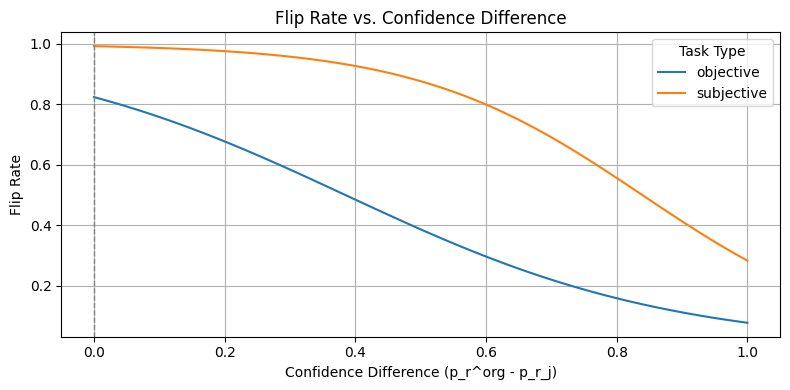

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare prediction range
diff_p_range = np.linspace(df_all["diff_p"].min(), df_all["diff_p"].max(), 100)

# Create a dataframe for predictions
predict_df = pd.DataFrame({
    "diff_p": np.tile(diff_p_range, 2),
    "task": np.repeat(["objective", "subjective"], len(diff_p_range))
})

# Predict probabilities
predict_df["change_prob"] = model.predict(predict_df)

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=predict_df, x="diff_p", y="change_prob", hue="task")
plt.title("Flip Rate vs. Confidence Difference")
plt.xlabel("Confidence Difference (p_r^org - p_r_j)")
plt.ylabel("Flip Rate")
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Task Type")
plt.grid(True)
plt.tight_layout()
plt.show()

## C2: Format of Peer Information

### Data Sampling (200 cap)

In [ ]:
# benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
# for benchmark in benchmarks:
#     with open(f'../data/{benchmark}/results/org.pkl', 'rb') as f:
#         res_org = pickle.load(f)
#     sample_size = min(200, len(res_org))
#     sample_res_org = random.Random(benchmark).sample(res_org, sample_size)
#     with open(f'../data/{benchmark}/sample_results/org.pkl', 'wb') as f:
#         pickle.dump(sample_res_org, f)
    

### Data Generation

In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
factual = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
opinion = ["OpinionQA", "GlobalOpinionQA", "SIQA"]

for benchmark in benchmarks:

    with open(f'../data/{benchmark}/sample_results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)

    input_feat_list = []
    for disagree_size in range(1, 11): # row
        input_row = []
        for agree_size in range(1, 11): # column
            
            eval_feat = {
                'type': 'grp_count',
                'agree_size': agree_size,
                'disagree_size': disagree_size,
                'disagree_type': '2nd',
                'q_type': 'factual' if benchmark in factual else 'opinion',
                'order': 'random'
            }
            input_row.append(eval_feat)
        input_feat_list.append(input_row)

    results, accuracy = qa.qa_eval_matrix(res_org, input_feat_list)

    with open(f'../data/{benchmark}/sample_results/grp_count_10.pkl', 'wb') as f:
        pickle.dump(results, f)


In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
factual = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
opinion = ["OpinionQA", "GlobalOpinionQA", "SIQA"]

for benchmark in benchmarks:

    with open(f'../data/{benchmark}/sample_results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)


    input_feat_list = []
    for disagree_size in range(1, 11): # row
        input_row = []
        for agree_size in range(1, 11): # column

            eval_feat = {
                'type': 'grp_ratio',
                'agree_size': agree_size,
                'disagree_size': disagree_size,
                'disagree_type': '2nd',
                'q_type': 'factual' if benchmark in factual else 'opinion',
                'order': 'random'
            }
            input_row.append(eval_feat)
        input_feat_list.append(input_row)

    results, accuracy = qa.qa_eval_matrix(res_org, input_feat_list)

    with open(f'../data/{benchmark}/sample_results/grp_ratio_10.pkl', 'wb') as f:
        pickle.dump(results, f)

In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
factual = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
opinion = ["OpinionQA", "GlobalOpinionQA", "SIQA"]

for benchmark in benchmarks:

    with open(f'../data/{benchmark}/sample_results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)


    input_feat_list = []
    for disagree_size in range(1, 11): # row
        input_row = []
        for agree_size in range(1, 11): # column
            
            eval_feat = {
                'type': 'grp_list',
                'agree_size': agree_size,
                'disagree_size': disagree_size,
                'disagree_type': '2nd',
                'q_type': 'factual' if benchmark in factual else 'opinion',
                'order': 'random'
            }
            input_row.append(eval_feat)
        input_feat_list.append(input_row)

    results, accuracy = qa.qa_eval_matrix(res_org, input_feat_list)

    with open(f'../data/{benchmark}/sample_results/grp_list_10.pkl', 'wb') as f:
        pickle.dump(results, f)

In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
factual = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
opinion = ["OpinionQA", "GlobalOpinionQA", "SIQA"]

for benchmark in benchmarks:

    with open(f'../data/{benchmark}/sample_results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)

    org_reason = qa.qa_generate_reason(res_org, '2nd', 10)

    with open(f'../data/{benchmark}/sample_results/org_reason_10.pkl', 'wb') as f:
        pickle.dump(org_reason, f)

In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
factual = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
opinion = ["OpinionQA", "GlobalOpinionQA", "SIQA"]

for benchmark in benchmarks:

    with open(f'../data/{benchmark}/sample_results/org_reason_10.pkl', 'rb') as f:
        org_reason = pickle.load(f)

    input_feat_list = []
    for disagree_size in range(1, 11): # row
        input_row = []
        for agree_size in range(1, 11): # column

            eval_feat = {
                'type': 'grp_disc',
                'agree_size': agree_size,
                'disagree_size': disagree_size,
                'disagree_type': '2nd',
                'q_type': 'factual' if benchmark in factual else 'opinion',
                'order': 'random',
                'use_reason': False
            }
            input_row.append(eval_feat)
        input_feat_list.append(input_row)

    results, accuracy = qa.qa_eval_matrix(org_reason, input_feat_list)

    with open(f'../data/{benchmark}/sample_results/grp_disc_10.pkl', 'wb') as f:
        pickle.dump(results, f)

In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
factual = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
opinion = ["OpinionQA", "GlobalOpinionQA", "SIQA"]

for benchmark in benchmarks:

    with open(f'../data/{benchmark}/sample_results/org_reason_10.pkl', 'rb') as f:
        org_reason = pickle.load(f)

    input_feat_list = []
    for disagree_size in range(1, 11): # row
        input_row = []
        for agree_size in range(1, 11): # column

            eval_feat = {
                'type': 'grp_disc',
                'agree_size': agree_size,
                'disagree_size': disagree_size,
                'disagree_type': '2nd',
                'q_type': 'factual' if benchmark in factual else 'opinion',
                'order': 'random',
                'use_reason': True
            }
            input_row.append(eval_feat)
        input_feat_list.append(input_row)

    results, accuracy = qa.qa_eval_matrix(org_reason, input_feat_list)

    with open(f'../data/{benchmark}/sample_results/grp_reason_10.pkl', 'wb') as f:
        pickle.dump(results, f)

### Table 3: Format of Peer Information

In [30]:
def flatten(nested_list):
    flat = []
    for item in nested_list:
        if isinstance(item, list):
            flat.extend(flatten(item))
        else:
            flat.append(item)
    return flat

def p_value_to_stars(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return ""

In [19]:
factual = ["MMLU-Pro", "GPQA-Diamond", "ARC"]
opinion = ["OpinionQA", "GlobalOpinionQA", "SIQA"]
method_list = ['grp_count', 'grp_ratio', 'grp_list', 'grp_disc', 'grp_reason']

table2 = pd.DataFrame(columns = ["Method", 
                                 'Mean Flip Rate - Factual', 'Mean Flip Rate - Opinion',
                                 '#A - Factual', '#A - Opinion',
                                 '#D - Factual', '#D - Opinion',
                                 '#A - D - Factual', '#A - D - Opinion',])

for method in method_list:
    target_row = [method]
    factual_results = []
    opinion_results = []
    for benchmark in factual:
        with open(f'../data/{benchmark}/sample_results/{method}_10.pkl', 'rb') as f:
            factual_results.append(pickle.load(f)['data'])
    for benchmark in opinion:
        with open(f'../data/{benchmark}/sample_results/{method}_10.pkl', 'rb') as f:
            opinion_results.append(pickle.load(f)['data'])

    factual_results = flatten(factual_results)
    opinion_results = flatten(opinion_results)

    # Mean
    for results in [factual_results, opinion_results]:
        flip_list = [int(x['r'] != x['r^org']) for x in results]
        mean_flip_rate = np.mean(flip_list)
        target_row.append(round(mean_flip_rate, 4))

    # number of agree
    for results in [factual_results, opinion_results]:
        flip_list = [int(x['r'] != x['r^org']) for x in results]
        try:
            agree_size_list = [x['agree_size'] for x in results]
        except:
            agree_size_list = [round(x['group_size']*(1-x['disagree_ratio'])) for x in results]
        r_value, p_value = pearsonr(flip_list, agree_size_list)
        target_row.append(f"{r_value:.2f}{p_value_to_stars(p_value)}")

    # number of disagree
    for results in [factual_results, opinion_results]:
        flip_list = [int(x['r'] != x['r^org']) for x in results]
        try:
            disagree_size_list = [x['disagree_size'] for x in results]
        except:
            disagree_size_list = [round(x['group_size']*x['disagree_ratio']) for x in results]
        r_value, p_value = pearsonr(flip_list, disagree_size_list)
        target_row.append(f"{r_value:.2f}{p_value_to_stars(p_value)}")

    # number of agree - disagree
    for results in [factual_results, opinion_results]:
        flip_list = [int(x['r'] != x['r^org']) for x in results]
        try:
            agree_size_list = [x['agree_size'] for x in results]
        except:
            agree_size_list = [round(x['group_size']*(1-x['disagree_ratio'])) for x in results]
        try:
            disagree_size_list = [x['disagree_size'] for x in results]
        except:
            disagree_size_list = [round(x['group_size']*x['disagree_ratio']) for x in results]
        agree_diff_list = np.array(agree_size_list) - np.array(disagree_size_list)
        r_value, p_value = pearsonr(flip_list, agree_diff_list)
        target_row.append(f"{r_value:.2f}{p_value_to_stars(p_value)}")

    table2.loc[len(table2)] = target_row

In [20]:
table2

,Method,Mean Flip Rate - Factual,Mean Flip Rate - Opinion,#A - Factual,#A - Opinion,#D - Factual,#D - Opinion,#A - D - Factual,#A - D - Opinion
0,grp_count,0.2154,0.2694,-0.17***,-0.36***,0.16***,0.31***,-0.23***,-0.47***
1,grp_ratio,0.2226,0.3046,-0.28***,-0.41***,0.25***,0.38***,-0.37***,-0.56***
2,grp_list,0.2093,0.2954,-0.17***,-0.22***,0.15***,0.22***,-0.23***,-0.31***
3,grp_disc,0.2088,0.2824,-0.11***,-0.24***,0.09***,0.23***,-0.14***,-0.33***
4,grp_reason,0.2967,0.2957,-0.05***,-0.11***,0.05***,0.11***,-0.07***,-0.15***


### Figure 1: Format of Peer Information

In [ ]:
import plot
importlib.reload(plot)
import plot

benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
method_list = ['grp_count', 'grp_ratio', 'grp_list', 'grp_disc', 'grp_reason']
title = ['Count', 'Ratio', 'List', 'Disc', 'Reason']
list_PATH = [[f'../data/{benchmark}/sample_results/{method}_10.pkl' for benchmark in benchmarks] for method in method_list]
plot.plot_from_list(list_PATH, metric = 'flip_rate', list_title = title, vlimit=(0,0.7))

### Figure 2: Order of Peer Information

In [ ]:
import plot
importlib.reload(plot)
import plot

method_list = ['grp_count', 'grp_ratio', 'grp_list', 'grp_disc', 'grp_reason']
list_data = []
for method in method_list:
    with open(f'../data/MMLU-Pro/sample_results/{method}_10.pkl', 'rb') as f:
        data = pickle.load(f)
        list_data.append(data['data'])


list_ad_data = [[[] for _ in range(10)] for _ in range(10)]
list_da_data = [[[] for _ in range(10)] for _ in range(10)]

for target_data in list_data:
    for r_idx, row in enumerate(target_data):
        for c_idx, col in enumerate(row):
            for ele in col:
                if ele['order'] == 'ad':
                    list_ad_data[r_idx][c_idx].append(ele)
                elif ele['order'] == 'da':
                    list_da_data[r_idx][c_idx].append(ele)
                else:
                    raise ValueError("Invalid order value. Expected 'ad' or 'da'.")

plot.plot_from_list_data([list_ad_data, list_da_data], metric = 'flip_rate', list_title = ["Agree First", "Disagree First"], vlimit=None)

In [31]:
flatten_ad_data = flatten(list_ad_data)
flatten_da_data = flatten(list_da_data)

In [34]:
flip_rate_ad = np.array([int(x['r'] != x['r^org']) for x in flatten_ad_data])
flip_rate_da = np.array([int(x['r'] != x['r^org']) for x in flatten_da_data])

print(f"Mean Flip Rate - Agree First: {np.mean(flip_rate_ad):.2f}")
print(f"Mean Flip Rate - Disagree First: {np.mean(flip_rate_da):.2f}")

Mean Flip Rate - Agree First: 0.23
Mean Flip Rate - Disagree First: 0.30


## C3: Modifying the Strength of Herd Behavior

### Data Sampling

In [50]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)
    res_org = [x for x in res_org if x['p_r^org'] < 0.8]
    sample_size = min(500, len(res_org))
    print(benchmark, sample_size, len(res_org))
    # sample_res_org = random.Random(benchmark).sample(res_org, sample_size)
    # mas_org = qa.qa_eval_mas_org(sample_res_org, agent_count = 5)
    # with open(f'../data/{benchmark}/sample_results/mas_org_filtered.pkl', 'wb') as f:
    #     pickle.dump(mas_org, f)
    # list_data.append(mas_org)
    

MMLU-Pro 500 4746
GPQA-Diamond 109 109
ARC 30 30
OpinionQA 216 216
GlobalOpinionQA 500 552
SIQA 142 142


In [ ]:
# org baseline

benchmarks = ["MMLU-Pro", "GlobalOpinionQA"]
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)
    res_org = [x for x in res_org if x['p_r^org'] < 0.8]
    sample_size = min(500, len(res_org))
    print(benchmark, sample_size, len(res_org))
    sample_res_org = random.Random(benchmark).sample(res_org, sample_size)
    mas_org = qa.qa_eval_mas_org(sample_res_org, agent_count = 5)
    with open(f'../data/{benchmark}/sample_results/mas_org_filtered.pkl', 'wb') as f:
        pickle.dump(mas_org, f)
    list_data.append(mas_org)

MMLU-Pro 500 4746


Processing:   0%|                                          | 0/2500 [00:00<?, ?it/s]

Processing: 100%|███████████████████████████████| 2500/2500 [08:10<00:00,  5.10it/s]


GlobalOpinionQA 500 552


Processing: 100%|███████████████████████████████| 2500/2500 [03:01<00:00, 13.76it/s]


In [3]:
# cot baseline

benchmarks = ["MMLU-Pro", "GlobalOpinionQA"]
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)
    res_org = [x for x in res_org if x['p_r^org'] < 0.8]
    sample_size = min(500, len(res_org))
    sample_res_org = random.Random(benchmark).sample(res_org, sample_size)
    mas_org = qa.qa_eval_mas_cot(sample_res_org, agent_count = 5)
    with open(f'../data/{benchmark}/sample_results/mas_org_cot.pkl', 'wb') as f:
        pickle.dump(mas_org, f)

Processing: 100%|███████████████████████████████| 2500/2500 [03:44<00:00, 11.14it/s]


In [8]:
import math
from collections import Counter

def calculate_entropy(answers):
    n = len(answers)
    if n == 0:
        return 0.0

    counts = Counter(answers)
    entropy = 0.0
    for count in counts.values():
        p = count / n
        entropy -= p * math.log2(p)

    return entropy

In [ ]:
# Filtered with p_r^org < 0.8, capped with 500 examples per dataset

benchmarks = ["MMLU-Pro", "GlobalOpinionQA"]
for benchmark in benchmarks:
    entropy = []
    with open(f'../data/{benchmark}/sample_results/mas_org_filtered.pkl', 'rb') as f:
        mas_org = pickle.load(f)
    for peer_info in mas_org:
        peer_opinions = []
        for peer in peer_info:
            peer_opinions.append(peer_info[peer]['r^org'])
        entropy.append(calculate_entropy(peer_opinions))

    print(f"Entropy for {benchmark}: {np.mean(entropy):.2f} ± {np.std(entropy):.2f}")
        
# result of full dataset, capped with 200 example:
#
# Entropy for MMLU-Pro: 0.54 ± 0.64
# Entropy for GPQA-Diamond: 0.60 ± 0.57
# Entropy for ARC: 0.06 ± 0.23
# Entropy for OpinionQA: 0.19 ± 0.39
# Entropy for GlobalOpinionQA: 0.27 ± 0.42
# Entropy for SIQA: 0.07 ± 0.22

Entropy for MMLU-Pro: 1.10 ± 0.60
Entropy for GlobalOpinionQA: 0.82 ± 0.41


In [ ]:
# benchmarks = ["MMLU-Pro", "GlobalOpinionQA"]
# list_data = []
# for benchmark in benchmarks:
#     with open(f'../data/{benchmark}/sample_results/mas_org_filtered.pkl', 'rb') as f:
#         mas_org = pickle.load(f)
#     mas_res = qa.qa_eval_mas_res(mas_org)
#     with open(f'../data/{benchmark}/sample_results/mas_res_filtered.pkl', 'wb') as f:
#         pickle.dump(mas_res, f)
#     list_data.append(mas_res)
    

In [4]:
benchmarks = ["MMLU-Pro", "GlobalOpinionQA"]
list_data = []
for benchmark in benchmarks:
    with open(f'../data/{benchmark}/sample_results/mas_res_filtered.pkl', 'rb') as f:
        mas_res = pickle.load(f)
    with open(f'../data/{benchmark}/sample_results/mas_org_filtered.pkl', 'rb') as f:
        mas_org = pickle.load(f)
    with open(f'../data/{benchmark}/sample_results/mas_org_cot.pkl', 'rb') as f:
        mas_org_cot = pickle.load(f)
    mas_res["original"] = mas_org
    mas_res["cot"] = mas_org_cot

    list_data.append(mas_res)

### Table 3: Controllable herd behavior

In [5]:
from collections import Counter

def has_majority(answers):
    if not answers:
        return False
    count = Counter(answers)
    majority_threshold = len(answers) // 2 + 1  # more than half
    return any(v >= majority_threshold for v in count.values())

# Example usage:
print(has_majority(['A', 'A', 'B', 'C']))  # False
print(has_majority(['A', 'A', 'A', 'B']))  # True

False
True


In [16]:
def has_unanimous(answers):
    if not answers:
        return False
    return all(ans == answers[0] for ans in answers)

# Example usage:
print(has_unanimous(['A', 'A', 'A']))     # True
print(has_unanimous(['A', 'B', 'A']))     # False
print(has_unanimous([]))                 # False

True
False
False


In [6]:
from collections import Counter

def get_unique_plurality(answers):
    if not answers:
        return None
    count = Counter(answers)
    most_common = count.most_common()
    
    if len(most_common) == 1:
        return most_common[0][0]  # Only one answer exists
    
    if most_common[0][1] > most_common[1][1]:
        return most_common[0][0]  # Unique highest count
    else:
        return None  # Tie for highest count

# Example usage:
print(get_unique_plurality(['A', 'A', 'B', 'C']))   # A
print(get_unique_plurality(['A', 'B', 'C']))        # None (all equal)
print(get_unique_plurality(['A', 'B', 'B', 'A']))    # None (tie between A and B)

A
None
None


In [ ]:
from collections import Counter

def get_majority(answers):
    if not answers:
        return None
    count = Counter(answers)
    n = len(answers)
    for ans, freq in count.items():
        if freq > n // 2:
            return ans
    return None  # No majority

# Example usage:
print(get_majority(['A', 'A', 'B', 'A']))   # A (3 out of 4)
print(get_majority(['A', 'B', 'C']))        # None (no majority)
print(get_majority(['B', 'B', 'A', 'A']))   # None

A
None
None


In [13]:
def get_unanimous(answers):
    if not answers:
        return None
    first = answers[0]
    if all(ans == first for ans in answers):
        return first
    return None  # Not unanimous

# Example usage:
print(get_unanimous(['A', 'A', 'A']))       # A
print(get_unanimous(['A', 'A', 'B']))       # None
print(get_unanimous([]))                   # None

A
None
None


In [17]:
table3_mmlu = pd.DataFrame(columns = ["Method",
                                    "MMLU-Pro Flip Rate",
                                    "MMLU-Pro Entropy", 
                                    "MMLU-Pro Consensus Rate",
                                    "MMLU-Pro Accuracy"])

table3_glo = pd.DataFrame(columns = ["Method",
                                    "GlobalOpinionQA Flip Rate",
                                    "GlobalOpinionQA Entropy",
                                    "GlobalOpinionQA Consensus Rate"])

for dataset, benchmark in zip(list_data, ["MMLU-Pro", "GlobalOpinionQA"]):
    methods = list(dataset.keys())
    methods.remove("cot")
    methods = ["cot"] + methods
    methods.remove("original")
    methods = ["original"] + methods
    for method in methods:
        target_row = [method]
        list_flip_rate = []
        list_entropy = []
        list_consensus_rate = []
        list_accuracy = []
        for ele in dataset[method]:
            if method not in ["original", "cot"]:
                flip_rate = np.mean([x['r'] != x['r^org'] for x in ele.values()])
                list_flip_rate.append(flip_rate)

            if method in ["original", "cot"]:
                peer_opinions = [x['r^org'] for x in ele.values()]
            else:
                peer_opinions = [x['r'] for x in ele.values()]

            entropy = calculate_entropy(peer_opinions)
            list_entropy.append(entropy)

            bool_consensus = int(has_unanimous(peer_opinions))
            list_consensus_rate.append(bool_consensus)

            if benchmark == "MMLU-Pro":
                plularity_answer = get_unanimous(peer_opinions)
                list_accuracy.append(int(plularity_answer == ele["A"]['answer']))


        if method in ["original", "cot"]:
            target_row.append("-")
        else:
            target_row.append(f"{np.mean(list_flip_rate):.2f}") #  ± {np.std(list_flip_rate):.2f}
        target_row.append(f"{np.mean(list_entropy):.2f}") #  ± {np.std(list_entropy):.2f}
        target_row.append(f"{np.mean(list_consensus_rate):.2f}") #  ± {np.std(list_consensus_rate):.2f}
        if benchmark == "MMLU-Pro":
            target_row.append(f"{np.mean(list_accuracy):.2f}") #  ± {np.std(list_accuracy):.2f}
            table3_mmlu.loc[len(table3_mmlu)] = target_row
        else:
            table3_glo.loc[len(table3_glo)] = target_row
        
table3 = table3_mmlu.merge(table3_glo, how='inner', on='Method')
table3

,Method,MMLU-Pro Flip Rate,MMLU-Pro Entropy,MMLU-Pro Consensus Rate,MMLU-Pro Accuracy,GlobalOpinionQA Flip Rate,GlobalOpinionQA Entropy,GlobalOpinionQA Consensus Rate
0,original,-,1.10,0.13,0.04,-,0.82,0.14
1,cot,-,0.91,0.28,0.23,-,0.63,0.34
2,control,0.55,0.43,0.56,0.18,0.44,0.29,0.69
3,strong_factors,0.63,0.43,0.54,0.29,0.59,0.49,0.46
4,weak_factors,0.36,0.28,0.69,0.16,0.23,0.22,0.76
5,strong_prompt,0.55,0.43,0.57,0.17,0.44,0.29,0.69
6,weak_prompt,0.55,0.43,0.56,0.18,0.46,0.36,0.61


In [48]:
from scipy.stats import ttest_rel
import numpy as np

def get_metric_lists(dataset, benchmark, method):
    flip_rate, entropy, majority, acc = [], [], [], []
    for ele in dataset[method]:
        opinions = [x['r'] if method != "original" else x['r^org'] for x in ele.values()]

        if method != "original":
            flip_rate.append(np.mean([x['r'] != x['r^org'] for x in ele.values()]))

        entropy.append(calculate_entropy(opinions))
        majority.append(int(has_majority(opinions)))

        if benchmark == "MMLU-Pro":
            acc.append(int(get_unique_plurality(opinions) == ele["A"]['answer']))

    return flip_rate, entropy, majority, acc

def significance_vs_second_best(dataset, benchmark, alpha=0.05):
    """
    Compare each method against the second-best performer (per metric).
    """
    all_stats = {}
    flip_dict, entropy_dict, majority_dict, acc_dict = {}, {}, {}, {}

    methods = list(dataset.keys())

    # Collect all metric values
    for method in methods:
        flip, entropy, majority, acc = get_metric_lists(dataset, benchmark, method)
        if method != "original":
            flip_dict[method] = flip
        entropy_dict[method] = entropy
        majority_dict[method] = majority
        if benchmark == "MMLU-Pro":
            acc_dict[method] = acc

    def evaluate(metric_dict, goal="max"):
        # Compute mean for all methods
        metric_mean = {k: np.mean(v) for k, v in metric_dict.items()}
        # Sort based on goal
        reverse = (goal == "max")
        sorted_methods = sorted(metric_mean.items(), key=lambda x: x[1], reverse=reverse)
        best, second_best = sorted_methods[0][0], sorted_methods[1][0]
        sig_results = {}

        for method in metric_dict:
            if method == second_best:
                sig_results[method] = (metric_mean[method], "Second Best")
                continue

            t_stat, p_val = ttest_rel(metric_dict[method], metric_dict[second_best])
            sig = (p_val < alpha and
                   ((goal == "max" and np.mean(metric_dict[method]) > np.mean(metric_dict[second_best])) or
                    (goal == "min" and np.mean(metric_dict[method]) < np.mean(metric_dict[second_best]))))
            sig_results[method] = (np.mean(metric_dict[method]), sig)

        return sig_results

    all_stats['flip_rate'] = evaluate(flip_dict, goal="max")
    all_stats['entropy'] = evaluate(entropy_dict, goal="min")
    all_stats['majority_rate'] = evaluate(majority_dict, goal="max")
    if benchmark == "MMLU-Pro":
        all_stats['accuracy'] = evaluate(acc_dict, goal="max")

    return all_stats

In [49]:
mmlu_stats = significance_vs_second_best(list_data[0], benchmark="MMLU-Pro")
glo_stats = significance_vs_second_best(list_data[1], benchmark="GlobalOpinionQA")

In [51]:
glo_stats

{'flip_rate': {'control': (np.float64(0.44160000000000005), np.False_),
  'strong_factors': (np.float64(0.5872), np.True_),
  'weak_factors': (np.float64(0.2332), False),
  'strong_prompt': (np.float64(0.444), np.False_),
  'weak_prompt': (np.float64(0.458), 'Second Best')},
 'entropy': {'control': (np.float64(0.29338014670376605), 'Second Best'),
  'strong_factors': (np.float64(0.4934225060981175), np.False_),
  'weak_factors': (np.float64(0.2164225403259173), np.True_),
  'strong_prompt': (np.float64(0.29448210170463146), np.False_),
  'weak_prompt': (np.float64(0.35670311428090884), np.False_),
  'original': (np.float64(0.8247411952039331), np.False_)},
 'majority_rate': {'control': (np.float64(0.99), np.False_),
  'strong_factors': (np.float64(0.98), np.False_),
  'weak_factors': (np.float64(0.994), np.False_),
  'strong_prompt': (np.float64(0.986), np.False_),
  'weak_prompt': (np.float64(0.992), 'Second Best'),
  'original': (np.float64(0.934), False)}}

## Appendix: Different LLMs

In [ ]:
# benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
# llms = ['gpt-4o-mini', 'gpt-4o', 'gpt-4.1', 'gpt-4.1-mini', 'gpt-4.1-nano']
# type_names = ['2nd', 'lst']

# for benchmark in benchmarks:
#     with open(f'../data/{benchmark}/sample_results/org.pkl', 'rb') as f:
#         res_org = pickle.load(f)

#     for llm in llms:
#         res_org = qa.qa_eval_org(res_org, llm = llm)
#         with open(f'../data/{benchmark}/sample_results/org_{llm}.pkl', 'wb') as f:
#             pickle.dump(res_org, f)
#         for disagree_type in type_names:
#             results = qa.qa_eval_one(res_org, disagree_type, llm = llm)

#             with open(f'../data/{benchmark}/sample_results/one_{disagree_type}_{llm}.pkl', 'wb') as f:
#                 pickle.dump(results, f)

In [ ]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
llms = ['llama-3.3-70B']
type_names = ['2nd', 'lst']

for benchmark in benchmarks:
    with open(f'../data/{benchmark}/sample_results/org.pkl', 'rb') as f:
        res_org = pickle.load(f)

    for llm in llms:
        res_org = qa.qa_eval_org(res_org, llm = llm)
        with open(f'../data/{benchmark}/sample_results/org_{llm}.pkl', 'wb') as f:
            pickle.dump(res_org, f)
        for disagree_type in type_names:
            results = qa.qa_eval_one(res_org, disagree_type, llm = llm)

            with open(f'../data/{benchmark}/sample_results/one_{disagree_type}_{llm}.pkl', 'wb') as f:
                pickle.dump(results, f)

Processing: 100%|██████████| 200/200 [00:01<00:00, 166.11it/s]


In [3]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA"]
llms = ['gpt-4o-mini', 'gpt-4o', 'gpt-4.1', 'gpt-4.1-mini', 'gpt-4.1-nano', 'llama-3.3-70B', 'llama-3.2-3B', 'qwen-2.5-72B']
disagree_types = ['2nd', 'lst']

dict_results = {}
dict_results['Average'] = {f"{llm}_{disagree_type}":[] for llm in llms for disagree_type in disagree_types}
for benchmark in benchmarks:
    dict_results[benchmark] = {}
    for llm in llms:
        temp_inputs = {}
        for disagree_type in disagree_types:
            PATH = f'../data/{benchmark}/sample_results/one_{disagree_type}_{llm}.pkl'
            with open(PATH, 'rb') as f:
                retrieved_results = pickle.load(f)
                retrieved_results = [x for x in retrieved_results if x['r'] != None]
                temp_inputs[disagree_type] = retrieved_results

        unique_ids = set([x['question_id'] for x in temp_inputs[disagree_types[0]]])
        for disagree_type in disagree_types:
            unique_ids = unique_ids & set([x['question_id'] for x in temp_inputs[disagree_type]])

        for disagree_type in disagree_types:
            valid_results = [x for x in temp_inputs[disagree_type] if x['question_id'] in unique_ids]
            dict_results[benchmark][f"{llm}_{disagree_type}"] = valid_results
            dict_results['Average'][f"{llm}_{disagree_type}"].extend(valid_results)

In [4]:
benchmarks = ["MMLU-Pro", "GPQA-Diamond", "ARC", "OpinionQA", "GlobalOpinionQA", "SIQA", "Average"]

table1 = pd.DataFrame(columns=["Method"] + benchmarks)

for llm in llms:
    for disagree_type in disagree_types:
        row = [f"{llm}_{disagree_type}"]
        for benchmark in benchmarks:
            flip_rate = np.mean([int(r['r'] != r['r^org']) for r in dict_results[benchmark][f"{llm}_{disagree_type}"]])
            row.append(round(flip_rate, 2))
        table1.loc[len(table1)] = row

# Run paired t-test and annotate _2nd values if significantly smaller
for benchmark in benchmarks:
    for llm in llms:
        values_2nd = np.array([int(r['r'] != r['r^org']) for r in dict_results[benchmark][f"{llm}_2nd"]])
        values_lst = np.array([int(r['r'] != r['r^org']) for r in dict_results[benchmark][f"{llm}_lst"]])
    
        t_stat, p_val = ttest_rel(values_2nd, values_lst)
    
        if p_val < 0.05:
            table1[benchmark] = table1[benchmark].astype(object)
            if np.mean(values_2nd) > np.mean(values_lst):
                # If 2nd is significantly smaller, annotate with '*'
                original_value = table1.loc[table1["Method"] == f"{llm}_2nd", benchmark].tolist()[0]
                table1.loc[table1["Method"] == f"{llm}_2nd", benchmark] = f"{original_value}*"
            else:
                # If 2nd is significantly larger, annotate with '*'
                original_value = table1.loc[table1["Method"] == f"{llm}_lst", benchmark].tolist()[0]
                table1.loc[table1["Method"] == f"{llm}_lst", benchmark] = f"{original_value}*"

table1

,Method,MMLU-Pro,GPQA-Diamond,ARC,OpinionQA,GlobalOpinionQA,SIQA,Average
0,gpt-4o-mini_2nd,0.5*,0.59*,0.11*,0.64*,0.71*,0.16*,0.45*
1,gpt-4o-mini_lst,0.25,0.42,0.06,0.54,0.59,0.06,0.32
2,gpt-4o_2nd,0.55*,0.7*,0.06*,0.52*,0.57*,0.26*,0.44*
3,gpt-4o_lst,0.34,0.45,0.02,0.34,0.43,0.14,0.29
4,gpt-4.1_2nd,0.51*,0.63*,0.05*,0.66*,0.66*,0.22*,0.45*
5,gpt-4.1_lst,0.23,0.35,0.02,0.49,0.54,0.1,0.29
6,gpt-4.1-mini_2nd,0.46*,0.49*,0.04*,0.4*,0.42*,0.2*,0.33*
7,gpt-4.1-mini_lst,0.3,0.32,0.0,0.25,0.33,0.11,0.22
8,gpt-4.1-nano_2nd,0.62*,0.57*,0.18*,0.51*,0.62*,0.33*,0.47*
9,gpt-4.1-nano_lst,0.46,0.39,0.12,0.42,0.52,0.16,0.34


In [5]:
with open('../data/GPQA-Diamond/sample_results/one_2nd_llama-3.2-3B.pkl', 'rb') as f:
    temp_2nd = pickle.load(f)

with open('../data/GPQA-Diamond/sample_results/one_lst_llama-3.2-3B.pkl', 'rb') as f:
    temp_lst = pickle.load(f)

In [7]:
temp_2nd[6]

{'question_id': 19,
 'category': 'Physics',
 'question': 'A common approximation made in many-body nuclear calculations of some interaction (for example an electroweak interaction) is to suppose that nucleons in a nucleus behave in the same way as free nucleons. Which of the following four assumptions jointly imply this ""impulse"" approximation?\n\n1. The interaction current only interacts with individual nucleons.\n2. The nucleus is transparent apart from the selected nucleon.\n3. The quarks internal to the selected nucleon are non-relativistic.\n4. The interaction proceeds as if the selected nucleon experiences no binding forces.',
 'options': ['1,2,3', '2,3,4', '1,3,4', '1,2,4'],
 'answer': 'D',
 'r^org': 'B',
 'p_r^org': np.float64(0.5482601189759819),
 'topk^org': [('B', np.float64(0.5483)),
  ('A', np.float64(0.2935)),
  ('D', np.float64(0.0841)),
  ('C', np.float64(0.0742))],
 'r_j': 'A',
 'p_r_j': np.float64(0.2935),
 'r': 'B',
 'p_r': np.float64(0.4577062127145336),
 'topk': 

# DUMP

## ETHICS

In [ ]:
df_raw = pd.read_csv('../data/ETHICS/raw/cm_test.csv')

In [ ]:
ethics_full = []
for i, row in df_raw.iterrows():
    input_ele = {}
    input_ele['question_id'] = i
    input_ele['question'] = "Question: Would most people believe this reasonable or unreasonable to say?\n" + row['input'] 
    choices = ['reasonable', 'unreasonable']
    random.Random(i).shuffle(choices)
    input_ele['options'] = choices
    label = row['label']
    label_text = ['reasonable', 'unreasonable'][label]
    true_label = choices.index(label_text)
    answer = 'AB'[true_label]
    input_ele['answer'] = answer

    ethics_full.append(input_ele)

In [ ]:
with open('../data/ETHICS/results/full.pkl', 'wb') as f:
    pickle.dump(ethics_full, f)

print("total number of questions in ETHICS:", len(ethics_full))

res_org = qa.qa_eval_org(ethics_full)

with open('../data/ETHICS/results/org.pkl', 'wb') as f:
    pickle.dump(res_org, f)

total number of questions in ETHICS: 3885


Processing QA: 100%|██████████| 3885/3885 [01:20<00:00, 48.15it/s]


In [ ]:
with open('../data/ETHICS/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_org, disagree_type)
    with open(f'../data/ETHICS/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 3885/3885 [01:08<00:00, 56.37it/s]
